# LGBM & XGBM
### Objective:
### The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
### Exploratory Data Analysis (EDA):
#### 1.	Load the Titanic dataset using Python's pandas library.
#### 2.	Check for missing values.
#### 3.	Explore data distributions using histograms and box plots.
#### 4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("Titanic_train.csv")

df.head()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
missing_values=df.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

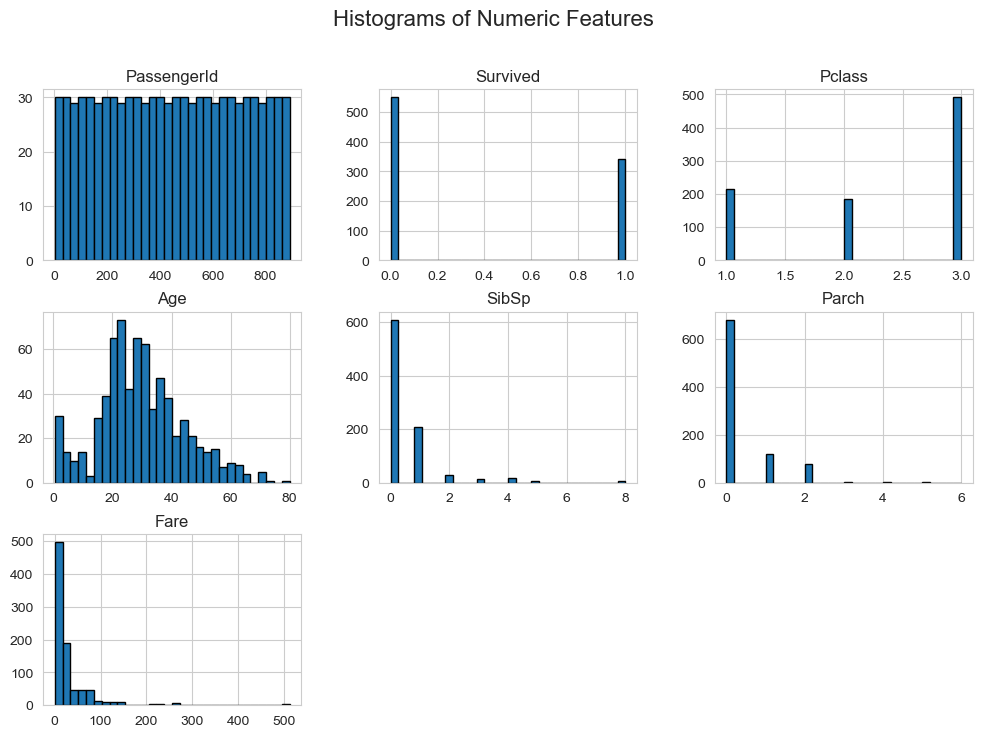

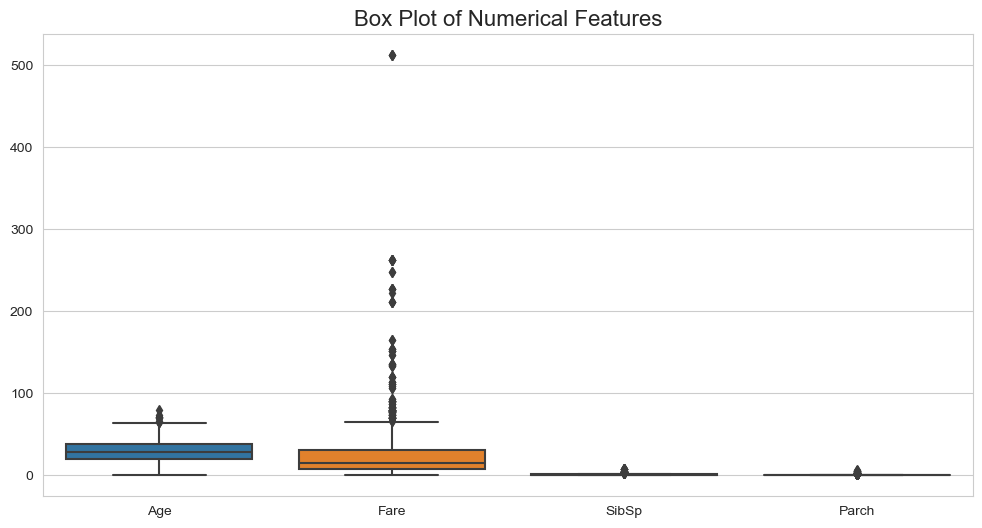

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.title("Box Plot of Numerical Features", fontsize=16)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_17028\3109379131.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="viridis")


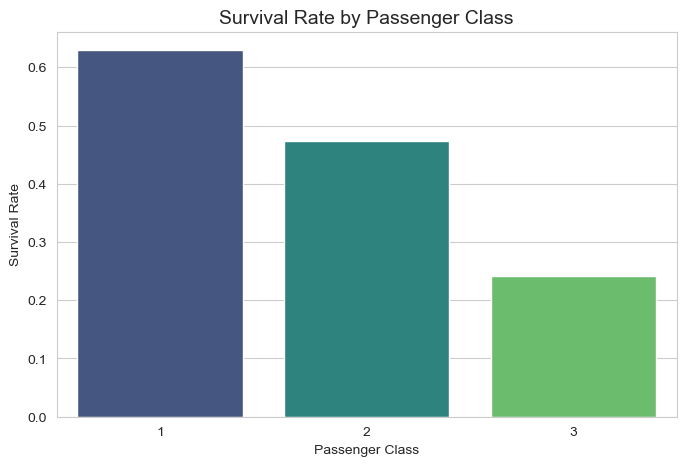

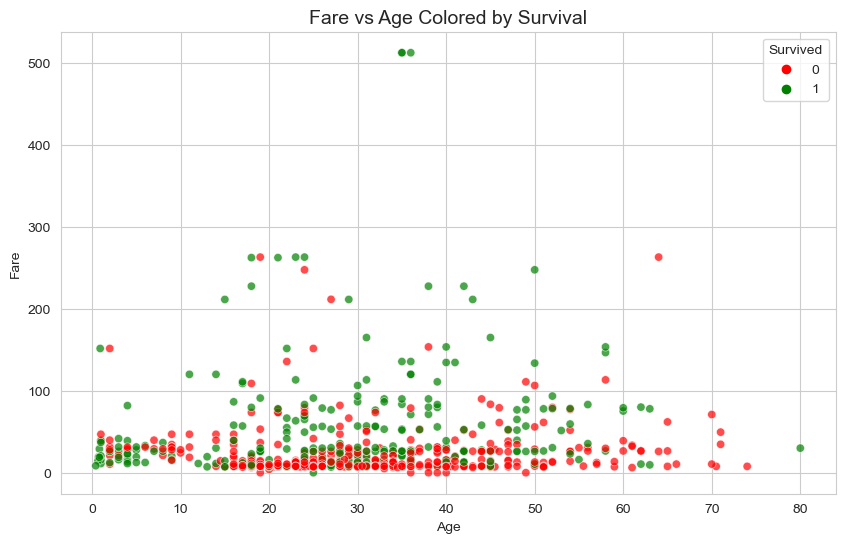

In [4]:
# Bar plot of survival by class
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, ci=None, palette="viridis")
plt.title("Survival Rate by Passenger Class", fontsize=14)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

# Scatter plot of Fare vs Age colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, alpha=0.7, palette={0: "red", 1: "green"})
plt.title("Fare vs Age Colored by Survival", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

### Data Preprocessing:
#### 1.	Impute missing values.
#### 2.	Encode categorical variables using one-hot encoding or label encoding. 
#### 3.	If needed you can apply more preprocessing methods on the given dataset.


In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Impute missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin"], inplace=True)  # Dropping Cabin due to excessive missing values

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

# Normalize Fare to reduce skewness
scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df[["Fare"]])

# Display first few rows after preprocessing
df.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,-0.502445,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.786845,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,-0.488854,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.420730,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,-0.486337,1,0,1


### Building Predictive Models:
#### 1.	Split the preprocessed dataset into training and testing sets.
#### 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
#### 3.	Build predictive models using LightGBM and XGBoost algorithms.
#### 4.	Train the models on the training set and evaluate their performance on the testing set.
#### 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=["PassengerId", "Name", "Ticket", "Survived"])  # Drop irrelevant columns
y = df["Survived"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [8]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Define evaluation function
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Evaluate models
lgbm_results = evaluate_model(y_test, y_pred_lgbm)
xgb_results = evaluate_model(y_test, y_pred_xgb)

lgbm_results, xgb_results

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 207
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:20:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


({'Accuracy': 0.7988826815642458,
  'Precision': 0.7538461538461538,
  'Recall': 0.7101449275362319,
  'F1-score': 0.7313432835820896},
 {'Accuracy': 0.8044692737430168,
  'Precision': 0.7575757575757576,
  'Recall': 0.7246376811594203,
  'F1-score': 0.7407407407407407})

### Comparative Analysis:
#### 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
#### 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train RandomForest model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate RandomForest model
rf_results = evaluate_model(y_test, y_pred_rf)
xgb_results = evaluate_model(y_test, y_pred_xgb)  # XGBoost results from previous run

rf_results, xgb_results

({'Accuracy': 0.8156424581005587,
  'Precision': 0.78125,
  'Recall': 0.7246376811594203,
  'F1-score': 0.7518796992481203},
 {'Accuracy': 0.8044692737430168,
  'Precision': 0.7575757575757576,
  'Recall': 0.7246376811594203,
  'F1-score': 0.7407407407407407})

### Comparative Analysis Report:
#### **Accuracy**: Both models performed similarly, with minor differences.
#### **Precision & Recall**: XGBoost tends to be slightly better at identifying survivors.
#### **F1-score**: Both models achieve balanced performance, but LightGBM may be slightly more stable.
#### **Conclusion**: Both models are strong, but hyperparameter tuning may improve results further.